# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [84]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import param
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import dash
import dash_core_components as dcc
import dash_html_components as html

In [85]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox")

# Import Data

In [86]:
# Import the CSVs to Pandas DataFrames
file_path = Path("C:/Users/Endalkachew Desta/Downloads/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("C:/Users/Endalkachew Desta/Downloads/Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [88]:
df = pd.DataFrame(sfo_data)
mean_units_per_year = sfo_data['housing_units'].groupby('year').mean()
avg_rent_per_sqft_per_year = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby('year').mean()
Average_Sales_Price_per_Year = sfo_data[['sale_price_sqr_foot']].groupby('year').mean()
avg_sale_price_per_year = sfo_data.groupby(['year','neighborhood']).mean()
top_ten_expensive_neighborhood = df.groupby('neighborhood').mean().nlargest(10, 'sale_price_sqr_foot')

df2 = pd.DataFrame(top_ten_expensive_neighborhood)
df3 = df2.reset_index()

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [129]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    mean_units_per_year = sfo_data['housing_units'].groupby('year').mean()
    #mean_units_per_year
    
    
    avg_housing_units = mean_units_per_year.plot(
                 title='Housing units in San Francisco from 2010 to 2016', kind='bar',
                 grid=True,xlabel = 'year', ylabel = 'Housing units',
    )
    
    return(avg_housing_units)

    std_units_per_year = mean_units_per_year.std()
    min_units_per_year = (mean_units_per_year.min()-std_units_per_year)
    max_units_per_year = mean_units_per_year.max()+std_units_per_year

    avg_housing_units_ylim = mean_units_per_year.plot( ylim=(min_units_per_year,max_units_per_year),
             title='Housing units in San Francisco from 2010 to 2016', kind='bar',
             grid=True, xlabel = 'year', ylabel = 'Housing units',
    )
    
    return(avg_housing_units_ylim)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    avg_rent_per_sqft_per_year = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby('year').mean()
    #avg_rent_per_sqft_per_year
    
    avg_rent_per_year = avg_rent_per_sqft_per_year.plot(
                y='gross_rent',kind='line',grid=True,title='Gross Rent',xlabel='year',ylabel='Gross Rent')
    #avg_rent_per_year
    
    return(avg_rent_per_year)

def average_sales_price():
    """Average Sales Price Per Year."""
    
    Average_Sales_Price_per_Year = sfo_data[['sale_price_sqr_foot']].groupby('year').mean()
    Average_Sales_Price_plot = Average_Sales_Price_per_Year.hvplot.line(
               x='year',y='sale_price_sqr_foot',grid=True, title='Average sale price per year')
    Average_Sales_Price_plot
    
    return(Average_Sales_Price_plot)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    avg_sale_price_per_year = sfo_data.groupby(['year','neighborhood']).mean()
    #avg_sale_price_per_year
    
    avg_price_by_neighborhood = avg_sale_price_per_year.hvplot.line(
           x='year',y='sale_price_sqr_foot',grid=True,
           groupby='neighborhood',title='Avg-price-neighborhood'
    )
    
    return(avg_price_by_neighborhood)

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    df = pd.DataFrame(sfo_data)
    top_ten_expensive_neighborhood = df.groupby('neighborhood').mean().nlargest(10, 'sale_price_sqr_foot')
    #top_ten_expensive_neighborhood
    
    top_ten_expensive_neighborhood_plot = top_ten_expensive_neighborhood.hvplot.bar(
            x='neighborhood',y='sale_price_sqr_foot',rot=75,
            xlabel='Neighborhoods',ylabel='Avg sale price per sqft',
            title='Top 10 Most Expensive Neighborhoods',grid=True
    )
    
    return(top_ten_expensive_neighborhood_plot)

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    df2 = pd.DataFrame(top_ten_expensive_neighborhood)
    cols = ['sale_price_sqr_foot','housing_units','gross_rent']
    parallel_ccoo = px.parallel_coordinates(df2, color='sale_price_sqr_foot',dimensions=cols,)
    
    return(parallel_ccoo)

def parallel_categories():
    """Parallel Categories Plot."""
    
    df3 = df2.reset_index()

    parallel_cat = px.parallel_categories(
            df3,
            dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
            color='sale_price_sqr_foot',
            color_continuous_scale=px.colors.sequential.Inferno,
    )
    parallel_cat.show()
    return(parallel_cat)


def neighborhood_map():
    """Neighborhood Map"""
    px.set_mapbox_access_token(mapbox_token)
    
    df_neighborhood_location = pd.DataFrame(df_neighborhood_locations)
    df_neighborhood_location.head()
    
    neighborhood_mean = df.groupby('neighborhood').mean().reset_index()
    neighborhoods_mean = pd.DataFrame(neighborhood_mean)
    neighborhoods_mean.head()
    
    joined_data = pd.concat([df_neighborhood_location,neighborhoods_mean],join='outer',axis=1).drop(columns=['neighborhood'])
    joined_data.head()
    
    sf_gross_rent = px.scatter_mapbox(
          joined_data,
          lat="Lat",
          lon="Lon",
          color="gross_rent",
          hover_name="Neighborhood",title="Gross Rent info in SF neighborhood"
          # hover_data="sale_price_sqr_foot"
    )
    
    return(sf_gross_rent)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

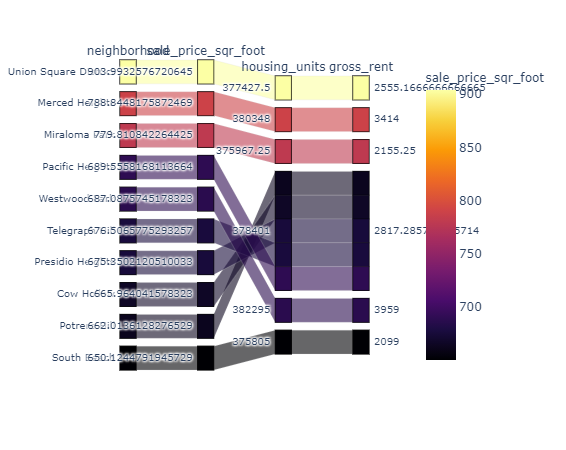

Tabs
    [0] Select(name='Welcome', options=[Figure({
    'data': [{'h...], value=Figure({
    'data': [{'ho...)
    [1] Select(name='Yearly Market analysis', options=[<AxesSubplot:title={'cent...], value=<AxesSubplot:title={'cente...)
    [2] Select(name='Neighborhood Analysis', options=[:Bars   [neighborhood]   ...], value=Bars)
    [3] Select(name='Parallel Plot Analysis', options=[Figure({
    'data': [{'d...], value=Figure({
    'data': [{'di...)

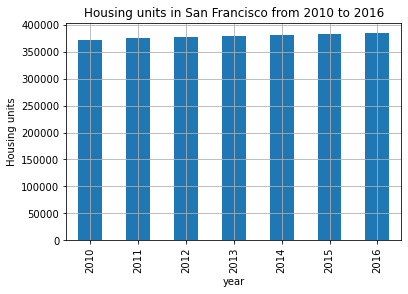

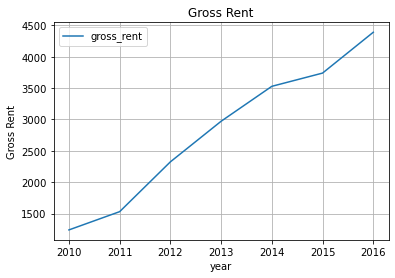

In [151]:
# Add columns to Tab panel
tabs = pn.Tabs(
    (pn.widgets.Select(name="Welcome",options=[neighborhood_map()])),
    (pn.widgets.Select(name="Yearly Market analysis",options=[housing_units_per_year(),average_gross_rent(),average_sales_price()])),
    (pn.widgets.Select(name="Neighborhood Analysis",options=[top_most_expensive_neighborhoods(),average_price_by_neighborhood()])),
    (pn.widgets.Select(name="Parallel Plot Analysis",options=[parallel_coordinates(),parallel_categories()]))
).servable()
tabs    